### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used to understand how exactly the demands vary with different features. Accordingly the business strategy can be manipulated to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

The Steps we will use in this exercise are as follows:
1. Reading, Understanding and Visualizing the dataset
2. Preparing the data for modelling (train-test split, rescaling etc.)
3. Training the model
4. Residual Analysis
5. Predictions and Evaluations on the test set.

### Step1: Reading, Understanding and Visualizing the dataset

In [1]:
#Importing the libraries and reading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset.
bike_sharing=pd.read_csv ('C:\\Users\\Sourav Roy\\Downloads\\UPGRAD MACHINE LEARNING I\\Machine Learning I Assignment\\day.csv')

In [3]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing.shape

(730, 16)

In [5]:
# Checking whether there are any missing values in the dataset.
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Dropping the columns which won't be contibuting in Model Building
bike_sharing.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [8]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Data Preparation:
    In the dataset, the variables like season, month, weekday etc  have values as 1,2,3,4 which have specific labels assciated with them as per data dictionary . These numeric values has no order to them. So, the same is converted into categorical strings values before proceeding with model building.

In [9]:
#mapping the season column
def season_map(x):
    return x.map({
        1:'spring',
        2:'summer',
        3:'fall',
        4:'winter',
    })
bike_sharing[['season']] = bike_sharing[['season']].apply(season_map)

In [10]:
#mapping the month column
def month_map(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })
bike_sharing[['mnth']] = bike_sharing[['mnth']].apply(month_map)

In [11]:
#mapping the weekday column
def weekday_map(x):
    return x.map({
        0:'sun',
        1:'mon',
        2:'tue',
        3:'wed',
        4:'thu',
        5:'fri',
        6:'sat'
    })
bike_sharing[['weekday']] = bike_sharing[['weekday']].apply(weekday_map)

In [12]:
#mapping the weathersit column
def weathersit_map(x):
    return x.map({
        1:'Clear',
        2:'Misty',
        3:'Light_snow',
        4:'Heavy_snow'
    })
bike_sharing[['weathersit']] = bike_sharing[['weathersit']].apply(weathersit_map)

In [13]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Visualize the dataset. 
1. In visualization we first check whether there is any linear realtionship with the target variable i.e. cnt in this regard.
2. See the multi-collinearity of the variables.

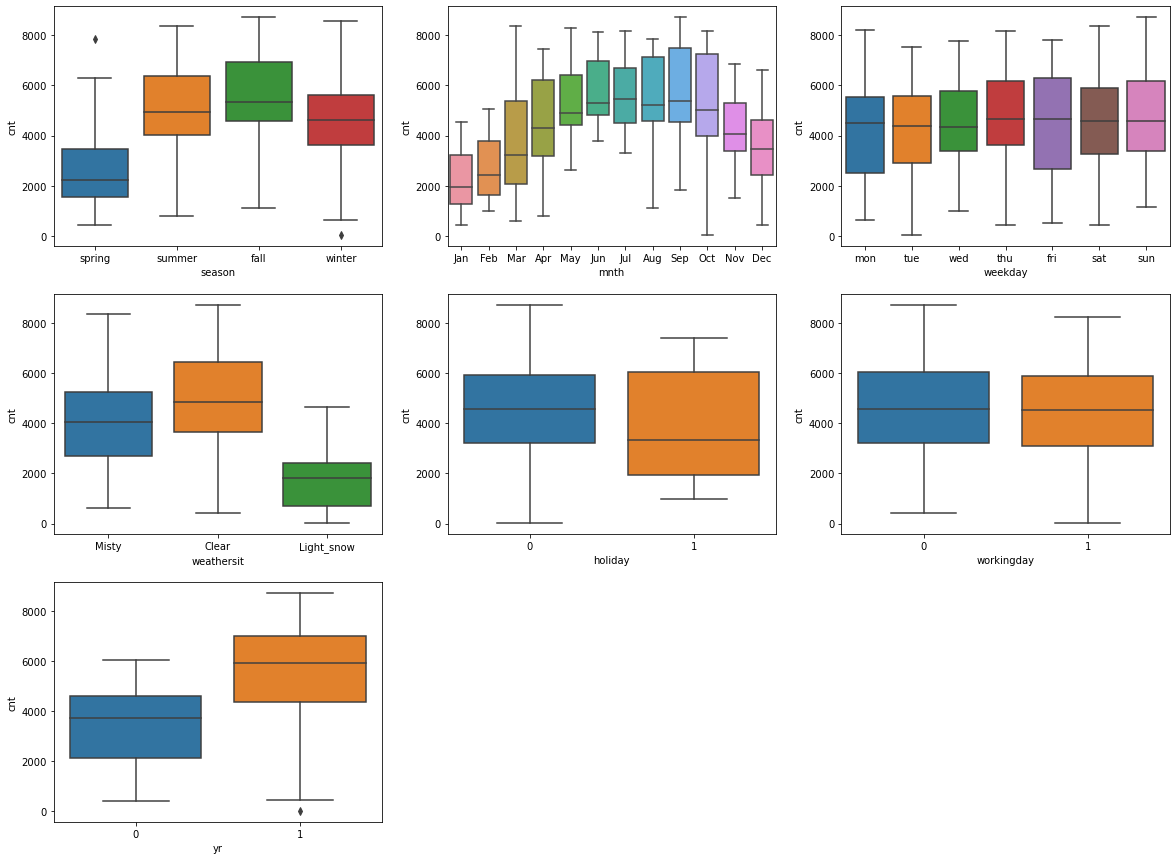

In [14]:
# Visualizing the Categorical data with the target variable.
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.show()

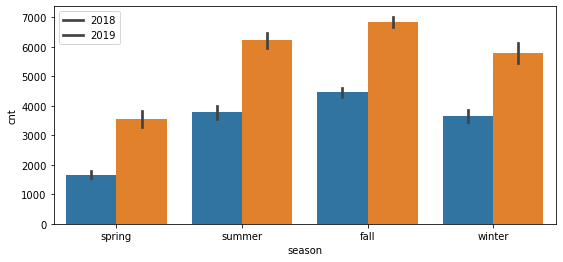

In [15]:
# Camparing 2018 booking w.r.t 2019 on the basis of season.
plt.figure(figsize = (9,4))
sns.barplot('season','cnt',data=bike_sharing,hue='yr')

plt.legend(labels=['2018', '2019'])
plt.show()

Fall season has witnessed more booking for both 2018 and 2019. However, there is an increase in number of booking for 2019 compared to 2018. 

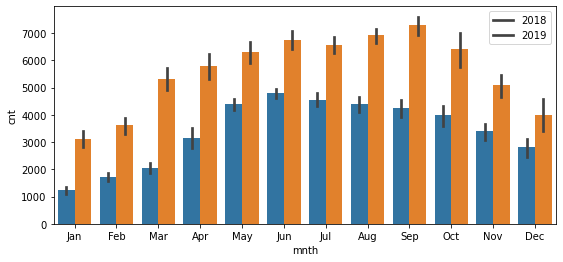

In [16]:
# Camparing 2018 booking w.r.t 2019 on the basis of month.
plt.figure(figsize = (9,4))
sns.barplot('mnth','cnt',data=bike_sharing,hue='yr')

plt.legend(labels=['2018', '2019'])
plt.show()

In 2018, it is observed that from June to Dec, the demand decreased on monthly basis. However, in 2019 the overall demand increased. Also, there has been an increase in demand on a month on month basis from May,2019 to Sep,2019.

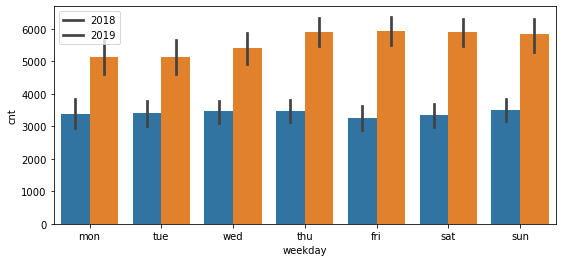

In [17]:
# Camparing 2018 booking w.r.t 2019 on the basis of weekday.
plt.figure(figsize = (9,4))
sns.barplot('weekday','cnt',data=bike_sharing,hue='yr')

plt.legend(labels=['2018', '2019'])
plt.show()

There is an increase in demand from 2018 to 2019. In 2019, usually Thursday, Friday, Saturday and Sunday observed more demand compared to rest of the days.

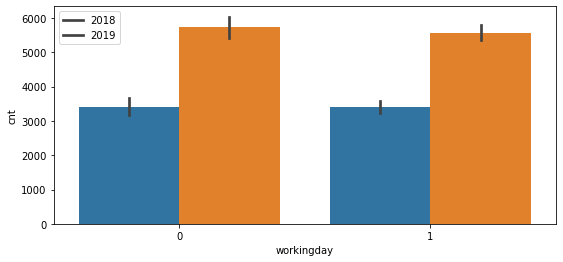

In [18]:
# Camparing 2018 booking w.r.t 2019 on the basis of workingday.
plt.figure(figsize = (9,4))
sns.barplot('workingday','cnt',data=bike_sharing,hue='yr')

plt.legend(labels=['2018', '2019'])
plt.show()

Bike sharing is more on holidays compared to working days. However the gap is very minimal.

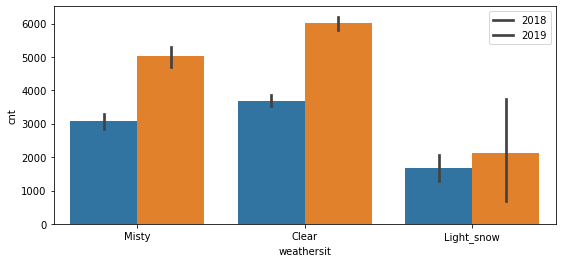

In [19]:
# Camparing 2018 booking w.r.t 2019 on the basis of weathersit.
plt.figure(figsize = (9,4))
sns.barplot('weathersit','cnt',data=bike_sharing,hue='yr')

plt.legend(labels=['2018', '2019'])
plt.show()

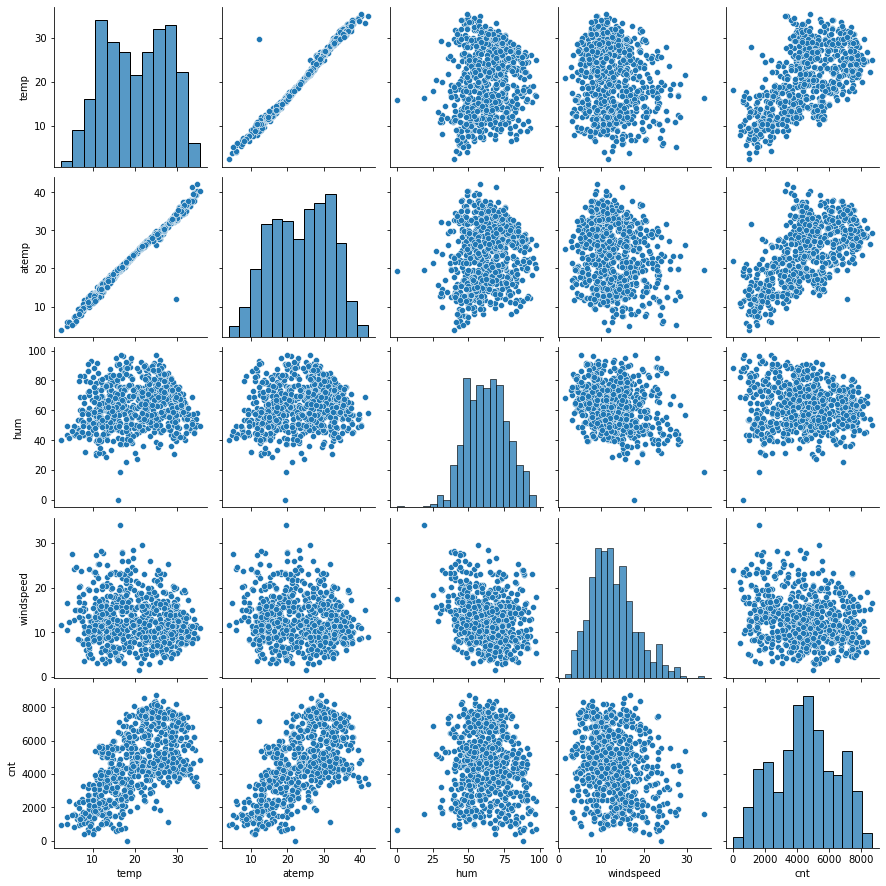

In [20]:
sns.pairplot(data=bike_sharing, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

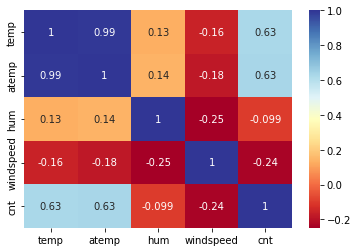

In [21]:
# Checking the correlation using Heatmap
sns.heatmap(bike_sharing[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap='RdYlBu')
plt.show()

Both Temp and atemp has very high correlation. So while designing the model, the p-value and vif of temp and atemp w.r.t other variables needs to be checked.

### Step-2 Preparing the data for modelling
After cleaning the unnecessary data, the data needs to be prepared for multiple linear regression. This involves handling the categorical variables first and then performing dummy encoding.
Steps followed are:
    - Encoding: Converting binary vars to 0 / 1 and Other categorical vars to dummy vars.
    - Splitting into train and test
    - Rescaling of variables

In [22]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Dummy Variables:
At first we need to identify the columns where we need to create the dummy variables.

In [23]:
# Identifying the categorical columns
dummy=bike_sharing.select_dtypes(exclude=['float64','datetime64','int64'])
dummy.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [24]:
# Creating dummy of the categorical columns.
bike_sharing_dummy = pd.get_dummies(dummy, drop_first=True)
bike_sharing_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Misty
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Dropping the categorical columns
bike_sharing = bike_sharing.drop(list(dummy.columns), axis=1)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# Concating the original data set with the dummy data set.
bike_sharing = pd.concat([bike_sharing, bike_sharing_dummy], axis=1)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
bike_sharing.shape

(730, 30)

In [28]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  mnth_Aug               730 non-null    uint8  
 12  mnth_Dec               730 non-null    uint8  
 13  mnth_Feb               730 non-null    uint8  
 14  mnth_Jan               730 non-null    uint8  
 15  mnth_J

In [29]:
bike_sharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
bike_sharing_train , bike_sharing_test = train_test_split(bike_sharing, train_size=0.7, random_state=100)
print(bike_sharing_train.shape)
print(bike_sharing_test.shape)

(510, 30)
(220, 30)


Rescaling the features: In MLR one of the challenge is the interpretation of the co-efficients after the model is trained. Eg. value of temp, atemp is different from workingday, holiday etc. The co-efficients of workingday will be higher and that of temp will be lower after modelling. So, to avoid the confusing we need to bring all the variables to comparable scale. Also, it makes the model fast. There are two ways of re-scaling 
1. Min-Max scaling (normalization): Between 0 and 1
2. Standardisation (mean-0, sigma-1)

We will be using Min-Max scaling

In [31]:
# Instantiate an object
scaler= MinMaxScaler()

# create a list of numeric variables
num_vars= ['temp','atemp','hum','windspeed','cnt']

# Fit on data
bike_sharing_train[num_vars] = scaler.fit_transform (bike_sharing_train[num_vars])
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [32]:
bike_sharing_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step-3 Training the Model

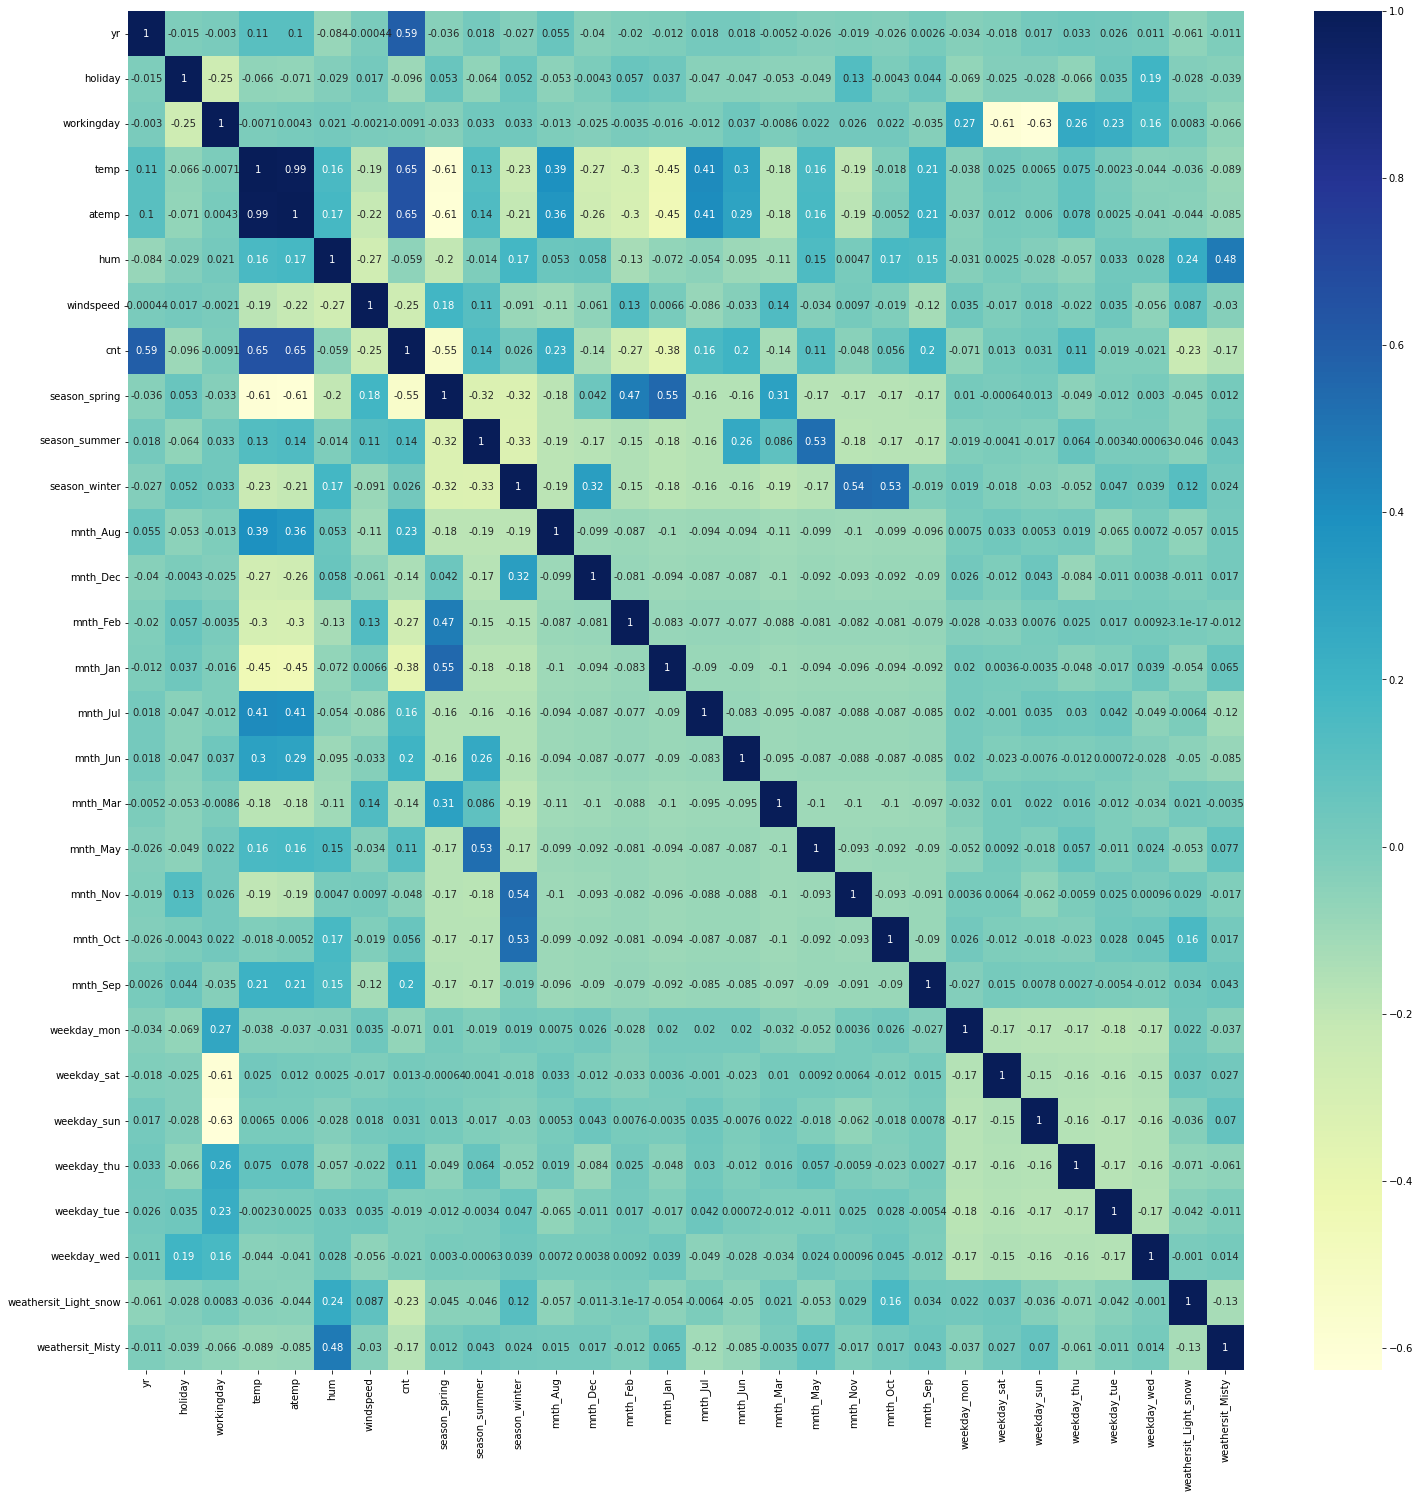

In [33]:
# heatmap to check the co-rellation between the variables.
plt.figure (figsize = (25,25))
sns.heatmap (bike_sharing_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

Cnt seems to have a strong relation with year, temp

In [34]:
bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snow', 'weathersit_Misty'],
      dtype='object')

In [35]:
y_train = bike_sharing_train.pop ('cnt')
X_train = bike_sharing_train

In [36]:
# build a model with all variables
X_train_sm= sm.add_constant (X_train)

# create model
lr = sm.OLS(y_train, X_train_sm )

# Fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.24e-177
Time:                        16:28:14   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3915      0.085      4.593      0.000       0.224       0.559
yr                        0.2312      0.008     28.360      0.000       0.215       0.247
holiday                  -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday               -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp                      0.3873      0.143      2.699      0.007       0.105       0.669
atemp                     0.0547      0.139      0.392      0.695      -0.219       0.329
hum                      -0.1579      0.039     -4.050      0.000      -0.234      -0.081
windspeed                -0.1802      0.027     -6.751      0.000      -0.233      -0.128
season_spring            -0.0409      0.030     -1.349      0.178      -0.100       0.019
season_summer             0.0458      0.026      1.733      0.084      -0.006       0.098
season_winter             0.1121      0.028      3.969      0.000       0.057       0.168
mnth_Aug                  0.0291      0.034      0.849      0.396      -0.038       0.096
mnth_Dec                 -0.0444      0.034     -1.308      0.191      -0.111       0.022
mnth_Feb                 -0.0373      0.033     -1.119      0.264      -0.103       0.028
mnth_Jan                 -0.0640      0.034     -1.887      0.060      -0.131       0.003
mnth_Jul                 -0.0274      0.035     -0.773      0.440      -0.097       0.042
mnth_Jun                  0.0097      0.025      0.384      0.701      -0.040       0.059
mnth_Mar                  0.0010      0.025      0.041      0.967      -0.048       0.050
mnth_May                  0.0256      0.021      1.196      0.232      -0.016       0.068
mnth_Nov                 -0.0395      0.037     -1.076      0.282      -0.112       0.033
mnth_Oct                  0.0058      0.036      0.159      0.874      -0.065       0.077
mnth_Sep                  0.0916      0.032      2.837      0.005       0.028       0.155
weekday_mon              -0.0247      0.015     -1.688      0.092      -0.053       0.004
weekday_sat              -0.0557      0.072     -0.777      0.438      -0.197       0.085
weekday_sun              -0.0499      0.072     -0.696      0.487      -0.191       0.091
weekday_thu               0.0042      0.015      0.280      0.780      -0.025       0.034
weekday_tue              -0.0261      0.015     -1.776      0.076      -0.055       0.003
weekday_wed              -0.0103      0.015     -0.670      0.503      -0.040       0.020
weathersit_Light_snow    -0.2492      0.027     -9.324      0.000      -0.302      -0.197
weathersit_Misty         -0.0578      0.011     -5.486      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.

p-value of 0.05 is considered as the confidence interval.

We use significance (p-value) and VIF to decide the variables we need to drop.

In [37]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,441.52
4,atemp,382.19
2,workingday,63.90
5,hum,41.23
7,season_spring,13.52
9,season_winter,12.43
23,weekday_sun,12.35
22,weekday_sat,11.84
8,season_summer,9.88
18,mnth_Nov,7.16


We generally consider VIF less than 5.

General Case:
1. High p-value, high VIF- drop
2. High p-value, low VIF - remove 1st 
3. low p-value, high VIF - remove after the one above
4. low p-value, low VIF- Keep

In [38]:
# Dropping the varialbles having high p-value and high VIF.
X_2= X_train.drop (['workingday','atemp','season_spring','weekday_sun','weekday_sat'], axis=1)

In [39]:
# Creating another model.
X_train_sm= sm.add_constant (X_2)

# create model
lr = sm.OLS(y_train, X_train_sm )

# Fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     113.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.73e-182
Time:                        16:28:27   Log-Likelihood:                 521.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     485   BIC:                            -887.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3105      0.040      7.802      0.000       0.232       0.389
yr                        0.2314      0.008     28.517      0.000       0.215       0.247
holiday                  -0.0844      0.026     -3.214      0.001      -0.136      -0.033
temp                      0.4494      0.046      9.697      0.000       0.358       0.540
hum                      -0.1597      0.039     -4.120      0.000      -0.236      -0.084
windspeed                -0.1857      0.026     -7.161      0.000      -0.237      -0.135
season_summer             0.0697      0.020      3.493      0.001       0.030       0.109
season_winter             0.1347      0.023      5.977      0.000       0.090       0.179
mnth_Aug                  0.0472      0.030      1.560      0.119      -0.012       0.107
mnth_Dec                 -0.0475      0.034     -1.408      0.160      -0.114       0.019
mnth_Feb                 -0.0526      0.031     -1.692      0.091      -0.114       0.008
mnth_Jan                 -0.0792      0.032     -2.487      0.013      -0.142      -0.017
mnth_Jul                 -0.0084      0.032     -0.262      0.793      -0.071       0.054
mnth_Jun                  0.0135      0.025      0.548      0.584      -0.035       0.062
mnth_Mar                 -0.0099      0.023     -0.422      0.673      -0.056       0.036
mnth_May                  0.0226      0.021      1.069      0.286      -0.019       0.064
mnth_Nov                 -0.0404      0.037     -1.104      0.270      -0.112       0.032
mnth_Oct                  0.0063      0.036      0.175      0.861      -0.065       0.077
mnth_Sep                  0.1072      0.030      3.597      0.000       0.049       0.166
weekday_mon              -0.0297      0.012     -2.493      0.013      -0.053      -0.006
weekday_thu               0.0003      0.012      0.021      0.983      -0.024       0.024
weekday_tue              -0.0303      0.012     -2.516      0.012      -0.054      -0.007
weekday_wed              -0.0136      0.013     -1.070      0.285      -0.039       0.011
weathersit_Light_snow    -0.2484      0.027     -9.369      0.000      -0.301      -0.196
weathersit_Misty         -0.0569      0.010     -5.421      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       73.954   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.696
Skew:                          -0.732   Prob(JB):                     6.43e-42
Kurtosis:                       5.605   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,36.15
3,hum,36.01
6,season_winter,8.03
16,mnth_Oct,6.09
15,mnth_Nov,5.80
7,mnth_Aug,5.17
4,windspeed,4.76
5,season_summer,4.70
11,mnth_Jul,4.69
8,mnth_Dec,4.28


In [41]:
# Dropping the varialbles having high p-value and low VIF.
X_3= X_2.drop (['mnth_Aug','mnth_Dec','mnth_Feb','mnth_Jul','mnth_Jun','mnth_Mar','mnth_May','mnth_Nov','mnth_Oct','weekday_thu',
               'weekday_wed'], axis=1)

In [42]:
# Creating another model.
X_train_sm= sm.add_constant (X_3)

# create model
lr = sm.OLS(y_train, X_train_sm )

# Fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.74e-189
Time:                        16:28:38   Log-Likelihood:                 509.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     496   BIC:                            -932.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2490      0.028      8.817      0.000       0.193       0.304
yr                        0.2299      0.008     28.300      0.000       0.214       0.246
holiday                  -0.0990      0.026     -3.862      0.000      -0.149      -0.049
temp                      0.5432      0.023     23.417      0.000       0.498       0.589
hum                      -0.1626      0.038     -4.324      0.000      -0.236      -0.089
windspeed                -0.1865      0.026     -7.234      0.000      -0.237      -0.136
season_summer             0.0841      0.011      8.013      0.000       0.064       0.105
season_winter             0.1303      0.011     11.464      0.000       0.108       0.153
mnth_Jan                 -0.0391      0.018     -2.232      0.026      -0.074      -0.005
mnth_Sep                  0.1041      0.016      6.691      0.000       0.074       0.135
weekday_mon              -0.0261      0.011     -2.306      0.021      -0.048      -0.004
weekday_tue              -0.0297      0.011     -2.612      0.009      -0.052      -0.007
weathersit_Light_snow    -0.2431      0.026     -9.214      0.000      -0.295      -0.191
weathersit_Misty         -0.0527      0.010     -5.028      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.143
Skew:                          -0.687   Prob(JB):                     5.49e-29
Kurtosis:                       5.058   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_3.columns
vif['VIF'] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.35
2,temp,10.03
4,windspeed,3.65
12,weathersit_Misty,2.15
0,yr,2.04
6,season_winter,1.93
5,season_summer,1.69
7,mnth_Jan,1.54
10,weekday_tue,1.24
9,weekday_mon,1.23


In [44]:
# Dropping the varialbles having low p-value and high VIF.
X_4= X_3.drop (['hum','weekday_mon','mnth_Jan','weekday_tue'], axis=1)

In [45]:
# Creating Final model.
X_train_sm= sm.add_constant (X_4)

# create model
lr = sm.OLS(y_train, X_train_sm )

# Fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.83e-186
Time:                        16:28:47   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1259      0.017      7.508      0.000       0.093       0.159
yr                        0.2329      0.008     27.962      0.000       0.216       0.249
holiday                  -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp                      0.5480      0.020     27.360      0.000       0.509       0.587
windspeed                -0.1532      0.025     -6.039      0.000      -0.203      -0.103
season_summer             0.0881      0.010      8.437      0.000       0.068       0.109
season_winter             0.1293      0.011     12.314      0.000       0.109       0.150
mnth_Sep                  0.1012      0.016      6.330      0.000       0.070       0.133
weathersit_Light_snow    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
weathersit_Misty         -0.0784      0.009     -8.844      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_4.columns
vif['VIF'] = [variance_inflation_factor(X_4.values, i) for i in range(X_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,season_summer,1.57
8,weathersit_Misty,1.48
5,season_winter,1.37
6,mnth_Sep,1.20
7,weathersit_Light_snow,1.08
1,holiday,1.04


The above model has R-square as 83% and Adj. R-Square as 82.7% which is a good value. Also, the p-values are near 0 and VIFs are below 5. The total number of variables also stands 10. So, the above model is considered as the final model.

### Step 4: Residual Analysis

In [47]:
y_train_pred = lr_model.predict(X_train_sm)

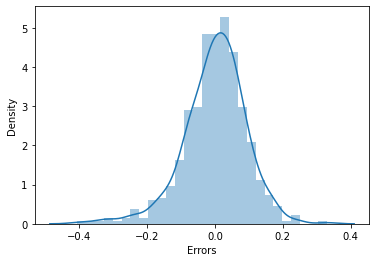

In [48]:
# plotting the residual
res= y_train - y_train_pred
sns.distplot(res)             
plt.xlabel('Errors', fontsize = 10)  
plt.show()

### Step 4: Predictions and Evaluation of Test set

In [49]:
# Rescaling
# create a list of numeric variables
num_vars= ['temp','atemp','hum','windspeed','cnt']

# Fit on data
bike_sharing_test[num_vars] = scaler.transform (bike_sharing_test[num_vars])
bike_sharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [50]:
bike_sharing_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
y_test = bike_sharing_test.pop ('cnt')
X_test = bike_sharing_test

In [52]:
# build a model with all variables
X_test_sm= sm.add_constant (X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow,weathersit_Misty
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,1,0,0,0,0,0,0


In [53]:
X_test_sm = X_test_sm.drop(['hum','weekday_mon','mnth_Jan','mnth_Aug','mnth_Dec','mnth_Feb','mnth_Jul','mnth_Jun','mnth_Mar','mnth_May','mnth_Nov','mnth_Oct','weekday_thu',
               'weekday_wed','workingday','atemp','season_spring','weekday_sun','weekday_sat','weekday_tue'], axis=1)

In [54]:
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_Sep,weathersit_Light_snow,weathersit_Misty
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [55]:
# predict
y_test_pred = lr_model.predict (X_test_sm)

In [56]:
# evaluate 
r2 = r2_score (y_test, y_test_pred)
round(r2,3)

0.794

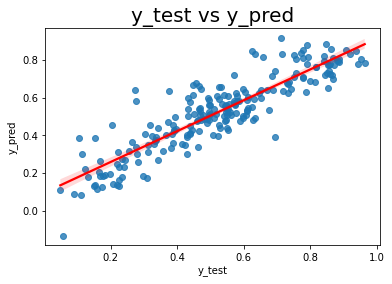

In [57]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)
plt.show()

In [58]:
round(lr_model.params,4)

const                    0.1259
yr                       0.2329
holiday                 -0.0987
temp                     0.5480
windspeed               -0.1532
season_summer            0.0881
season_winter            0.1293
mnth_Sep                 0.1012
weathersit_Light_snow   -0.2829
weathersit_Misty        -0.0784
dtype: float64

We can see that the equation is fitted as :
cnt= 0.1259 + 0.2329 * year - 0.0987 * holiday + 0.5480 * temp - 0.1532 * windspeed + 0.0881 * season_summer + 0.1293 * season_winter + 0.1012 * mnth_Sep - 0.2829 * weathersit_Light_snow - 0.0784 * weathersit_Misty

In [59]:
adjusted_r2 = round(1-(1-r2)*(X_4.shape[0]-1)/(X_4.shape[0]-X_4.shape[1]-1),4)
print(adjusted_r2)

0.7905


Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.830
- Test dataset R^2           : 0.794
- Train dataset Adjusted R^2 : 0.827    
- Test dataset Adjusted R^2  : 0.791

### We can finally conclude that demand of bikes depend on year, holiday, temperature, windspeed, summer season, winter season, September month, Light snow and Misty weather.